In [97]:
import matplotlib.pyplot as plt
import networkx as nx

# 设置字体为支持中文的字体
# fc-list :lang=zh 列出系统中存在的中文字体，要存在才可以用
from matplotlib import font_manager, rcParams

# 设置字体路径
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'  # 选择合适的字体路径
font_prop = font_manager.FontProperties(fname=font_path)

# 设置中文字体为 Noto Sans CJK SC
rcParams['font.sans-serif'] = ['Noto Sans CJK SC', 'Noto Serif CJK SC']  # 或者其他字体
rcParams['axes.unicode_minus'] = False  # 防止负号显示为乱码

# import matplotlib.font_manager as fm
# # 获取所有字体路径
# font_paths = fm.findSystemFonts(fontpaths=None, fontext='ttc')

# # 打印包含 'Noto' 字样的字体路径，检查字体是否存在
# for path in font_paths:
#     if 'Noto' in path:
#         print(path)

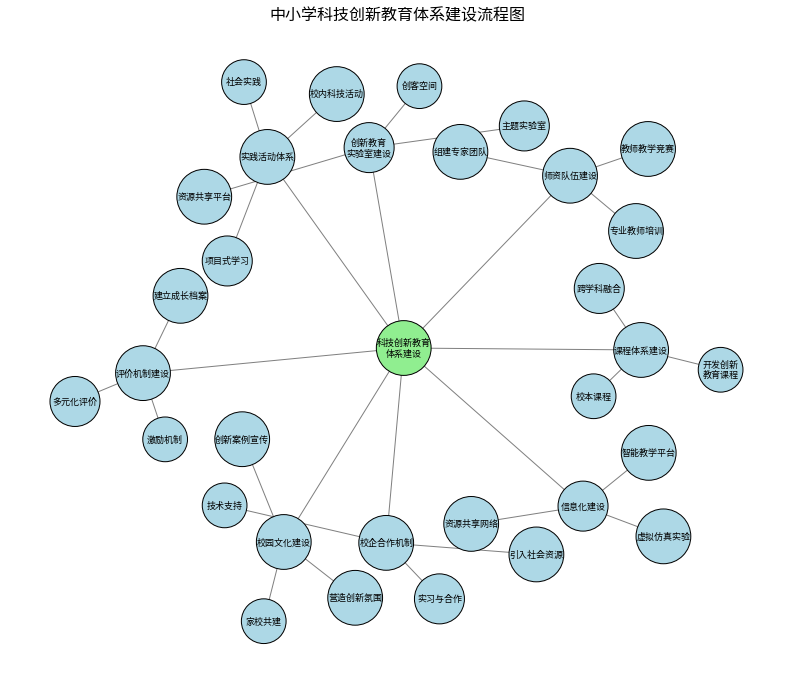

In [120]:
# 创建一个有向图
G = nx.DiGraph()

# 定义主要建设内容及子内容
main_topics = [
    "课程体系建设", "师资队伍建设", "创新教育\n实验室建设", 
    "实践活动体系", "评价机制建设", "校园文化建设", "校企合作机制", "信息化建设"
]

sub_topics = {
    "课程体系建设": ["开发创新\n教育课程", "跨学科融合", "校本课程"],
    "师资队伍建设": ["专业教师培训", "组建专家团队", "教师教学竞赛"],
    "创新教育\n实验室建设": ["主题实验室", "创客空间", "资源共享平台"],
    "实践活动体系": ["校内科技活动", "社会实践", "项目式学习"],
    "评价机制建设": ["多元化评价", "建立成长档案", "激励机制"],
    "校园文化建设": ["营造创新氛围", "创新案例宣传", "家校共建"],
    "校企合作机制": ["引入社会资源", "技术支持", "实习与合作"],
    "信息化建设": ["智能教学平台", "虚拟仿真实验", "资源共享网络"],
}

# 顶级主题节点
G.add_node("科技创新教育\n体系建设", color="lightgreen", size=3000)

# 连接顶级主题与主要建设内容
for topic in main_topics:
    G.add_edge("科技创新教育\n体系建设", topic)

# 添加核心节点及其子节点
for topic, subs in sub_topics.items():
    G.add_node(topic, color="lightblue", size=2000)
    for sub in subs:
        G.add_edge(topic, sub)

# 获取节点颜色和大小
colors = [G.nodes[n].get("color", "lightblue") for n in G.nodes]

# sizes = [G.nodes[n].get("size", 1000) for n in G.nodes]
# 计算节点大小，使其适应文本大小
def get_node_size(text, font_properties):
    # 创建一个临时的 figure 和 axes 来获取渲染器
    fig, ax = plt.subplots()
    text_obj = ax.text(0, 0, text, fontproperties=font_properties)
    ax.set_axis_off()  # 不需要显示坐标轴
    fig.canvas.draw()  # 强制绘制图形以生成渲染器
    bbox = text_obj.get_window_extent()
    plt.close(fig)  # 关闭临时图形
    # 返回节点大小，稍微放大以适应文字
    return max(bbox.width, bbox.height) * 50

# 为每个节点计算大小
sizes = [get_node_size(n, font_prop) for n in G.nodes]

# 布局设置
# pos = nx.spring_layout(G, seed=42, k=0.8)
# 调整弹簧常数 k 和迭代次数 iterations，避免节点重叠
# pos = nx.spring_layout(G, seed=42, k=0.8, iterations=1000)
# pos = nx.spring_layout(G, seed=42, k=2, iterations=2000)

# 布局设置
pos = {}
# 设置中心节点的位置
pos["科技创新教育\n体系建设"] = (0, 0)

# 将main_topics围绕中心节点放置
angle_gap = 2 * 3.14159 / len(main_topics)  # 计算角度间隔
radius_main = 4  # 设置主节点环绕的半径
for i, topic in enumerate(main_topics):
    angle = i * angle_gap
    pos[topic] = (radius_main * np.cos(angle), radius_main * np.sin(angle))

# 将sub_topics围绕其对应的main_topic节点放置
radius_sub = 2  # 设置子节点环绕的半径
for main_topic, subs in sub_topics.items():
    main_pos = pos[main_topic]
    sub_angle_gap = 2 * 3.14159 / len(subs)  # 计算子节点角度间隔
    for i, sub in enumerate(subs):
        angle = i * sub_angle_gap
        pos[sub] = (main_pos[0] + radius_sub * np.cos(angle), main_pos[1] + radius_sub * np.sin(angle))

pos = nx.spring_layout(G, pos=pos, k=0.5, iterations=2000)


# 在 Jupyter 中确保绘图可以显示
%matplotlib inline 

# 绘制图形
# 绘制图形时设置背景色为白色
plt.figure(figsize=(14, 12), facecolor='white')

nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color=colors, edgecolors="black")
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle="-|>", arrowsize=10, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=9, font_color="black", font_family=font_prop.get_name()
                        ,bbox=dict(facecolor='none', edgecolor='none', boxstyle="round,pad=0.2")
                        )# 这里需要添加 font_family 参数

# 设置标题和隐藏坐标轴
plt.title("中小学科技创新教育体系建设流程图", fontsize=16, fontproperties=font_prop)
plt.axis("off")
plt.show()